Epoch [50/10000], Loss: 0.0036
Epoch [100/10000], Loss: 0.0015
Epoch [150/10000], Loss: 0.0014
Epoch [200/10000], Loss: 0.0011
Epoch [250/10000], Loss: 0.0011
Epoch [300/10000], Loss: 0.0010
Epoch [350/10000], Loss: 0.0010
Epoch [400/10000], Loss: 0.0009
Epoch [450/10000], Loss: 0.0009
Epoch [500/10000], Loss: 0.0011
Epoch [550/10000], Loss: 0.0015
Epoch [600/10000], Loss: 0.0014
Epoch [650/10000], Loss: 0.0014
Epoch [700/10000], Loss: 0.0014
Epoch [750/10000], Loss: 0.0014
Epoch [800/10000], Loss: 0.0013
Epoch [850/10000], Loss: 0.0013
Epoch [900/10000], Loss: 0.0013
Epoch [950/10000], Loss: 0.0013
Epoch [1000/10000], Loss: 0.0013
Epoch [1050/10000], Loss: 0.0013
Epoch [1100/10000], Loss: 0.0012
Epoch [1150/10000], Loss: 0.0012
Epoch [1200/10000], Loss: 0.0012
Epoch [1250/10000], Loss: 0.0012
Epoch [1300/10000], Loss: 0.0012
Epoch [1350/10000], Loss: 0.0011
Epoch [1400/10000], Loss: 0.0011
Epoch [1450/10000], Loss: 0.0011
Epoch [1500/10000], Loss: 0.0010
Epoch [1550/10000], Loss: 0.00

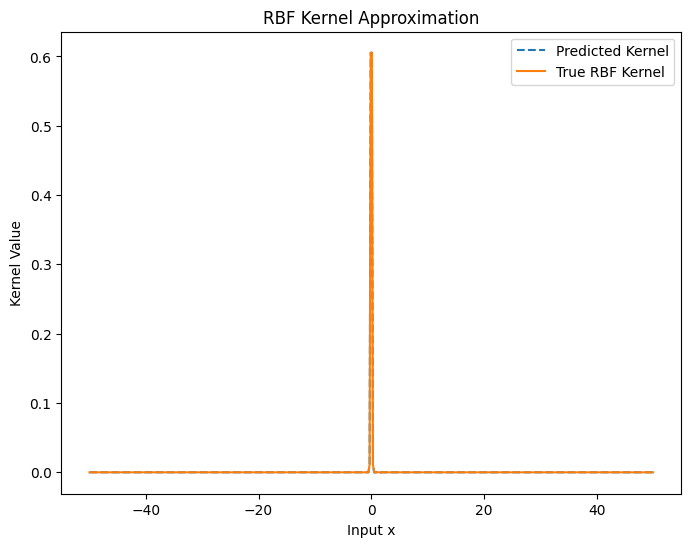

In [36]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# RBF 커널 정의
def rbf_kernel(x1, x2, variance=1.0, lengthscale=1.0):
    dist_sq = torch.sum((x1 - x2) ** 2, dim=1, keepdim=True)  # Squared Euclidean distance
    return variance * torch.exp(-0.5 * dist_sq / lengthscale**2)

# 데이터 생성
torch.manual_seed(0)
num_samples = 500
# x1 = torch.rand(num_samples, 1) * 10  # Uniformly sampled inputs in range [0, 10]
x2 = torch.linspace(-50.0, 50.0, 500).reshape(-1, 1)  # Regularly spaced inputs in range [-10, 10]
x1 = torch.tensor(0.0)
y = rbf_kernel(x1, x2, variance=1.0, lengthscale=0.1)  # Target RBF kernel values

# 다차원 출력 신경망 정의
class MultiOutputNet(nn.Module):
    def __init__(self, input_dim=1, output_dim=10):
        super(MultiOutputNet, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, output_dim)
        )
    
    def forward(self, x):
        return self.fc(x)


# 모델, 손실 함수, 옵티마이저 설정
output_dim = 5  # 다차원 출력 크기
model = MultiOutputNet(input_dim=1, output_dim=output_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)


# 학습 루프
epochs = 10000
for epoch in range(epochs):
    optimizer.zero_grad()
    
    # 모델 출력
    f_x1 = model(x1.unsqueeze(0))  # [num_samples, output_dim]
    f_x2 = model(x2)  # [num_samples, output_dim]
    output = torch.sum(f_x1 * f_x2, dim=1, keepdim=True)  # f(x1)^\top f(x2)
    # output = f_x1 @ f_x2.T  # [num_samples, num_samples]
    # 손실 계산
    loss = criterion(output, y)
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 50 == 0:
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")


# 테스트 및 결과 확인
with torch.no_grad():
    test_x1 = x1  # Test points
    test_x2 = x2
    f_test_x1 = model(test_x1.unsqueeze(0))
    f_test_x2 = model(test_x2)
    predicted_kernel = torch.sum(f_test_x1 * f_test_x2, dim=1)
    # predicted_kernel = f_test_x1 @ f_test_x2.T
    # 시각화
    plt.figure(figsize=(8, 6))
    plt.plot(test_x2.numpy(), predicted_kernel.numpy(), label="Predicted Kernel", linestyle="--")
    plt.plot(test_x2.numpy(), y.numpy(), label="True RBF Kernel")
    plt.xlabel("Input x")
    plt.ylabel("Kernel Value")
    plt.legend()
    plt.title("RBF Kernel Approximation")
    plt.show()
